In [1]:
import os
import rosbag
from matplotlib import pyplot as plt
import cv2
from cv_bridge import CvBridge

from geometry_msgs.msg import Twist
from sensor_msgs.msg import Image
#from bebop_msgs.msg import Ardrone3PilotingStateAltitudeChanged

Number of cmds: 353
Number of flows: 706
x: 0.0
y: 0.0
z: 0.0


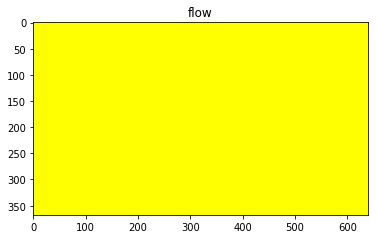

In [2]:
nbFrames = 2

bag = rosbag.Bag('test_2020-06-15-19-36-39.bag')
bridge = CvBridge()

cmdVel = []
optFlow = []
pairs = dict()
pairs["flow"] = []
pairs["cmd"] = []

cnt = 0
for topic, msg, t in bag.read_messages(topics=['/bebop/cmd_vel', '/flow']):
    if topic == '/flow':
        optFlow.append(bridge.imgmsg_to_cv2(msg, 'bgr16'))
        
    if topic == '/bebop/cmd_vel':
        cmdVel.append(msg.linear)
        if len(optFlow) >= nbFrames:
            for i in range(nbFrames):
                pairs["flow"].append(optFlow[len(optFlow) - 1 + i - nbFrames])
            pairs["cmd"].append(cmdVel[-1])

print("Number of cmds: " + str(len(pairs["cmd"])))
print("Number of flows: " + str(len(pairs["flow"])))

print(pairs["cmd"][0])
rgb_f = cv2.cvtColor(pairs["flow"][0], cv2.COLOR_BGR2RGB)
plt.imshow(rgb_f)
plt.title('flow')
plt.show()

bag.close()

In [3]:
print(pairs["cmd"][201])
print(pairs["flow"][201][:,:,0])

x: 0.1
y: 0.0
z: 0.0
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
